In [2]:
import gzip, os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

class MNIST():    
    def __init__(self):
        self.path = './mnist'
        self.test_img_fname = 't10k-images-idx3-ubyte.gz'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte.gz'
        self.train_img_fname = 'train-images-idx3-ubyte.gz'
        self.train_lbl_fname = 'train-labels-idx1-ubyte.gz'
        self.test_images = []
        self.test_labels = []
        self.train_images = []
        self.train_labels = []       
        self.image_size = 28
        self.train_num_image = 60000
        self.test_num_image = 10000       
        self.cmap = "Greys"
    def load_train_images(self):
        f = gzip.open(os.path.join(self.path,self.train_img_fname),'r')
        f.read(16)
        buf = f.read()
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(self.train_num_image, self.image_size, self.image_size)
        self.train_images = data
        return data
    def load_train_labels(self):
        f = gzip.open(os.path.join(self.path,self.train_lbl_fname),'r')
        f.read(8)
        buf = f.read()
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(self.train_num_image)
        self.train_labels = data
        return data   
    def load_test_images(self):
        f = gzip.open(os.path.join(self.path,self.test_img_fname),'r')
        f.read(16)
        buf = f.read()
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(self.test_num_image, self.image_size, self.image_size)
        self.test_images = data
        return data
    def load_test_labels(self):
        f = gzip.open(os.path.join(self.path,self.test_lbl_fname),'r')
        f.read(8)
        buf = f.read()
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(self.test_num_image)
        self.test_labels = data
        return data     
mnist = MNIST()

In [3]:
x_train = mnist.load_train_images()
y_train = mnist.load_train_labels()

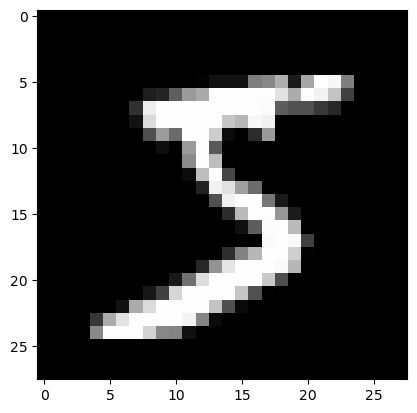

In [4]:
def display_image(img):
    plt.imshow(img, cmap='grey')
display_image(x_train[0])

In [5]:
"""
Retourne la moyenne de la valeur des pixels de toutes les images représentant un chiffre donné
"""
def get_mean(x_train, y_train, digit):
    return x_train[y_train==digit].mean()
get_mean(x_train, y_train, 9)


31.260427

In [6]:
"""
Aplatit les 2 dernières dimensions d'un jeu d'image en noir et blanc pour qu'elles soient ingérables par un algo de ML
"""
def imageTo1D(x):
    return x.reshape(x.shape[0], x.shape[1] * x.shape[2])



In [7]:
from sklearn.neighbors import KNeighborsClassifier
"""
Instanciation d'un modèle de ML (un KNN) et entrainement sur un jeu d'image
"""
model = KNeighborsClassifier()
model.fit(imageTo1D(x_train), y_train)

KNeighborsClassifier()

In [8]:
"""
Exemple de prédiction.
Attention, ici on triche puisque l'on fait une prédiction sur une image du jeu d'entrainement. 
"""
model.predict(imageTo1D(np.array([x_train[2002]])))



array([8.], dtype=float32)

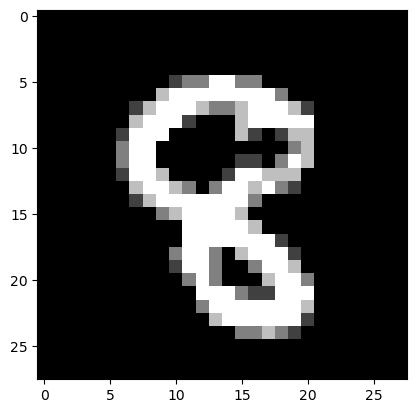

In [9]:
display_image(x_train[2002 ])

In [10]:
"""
Pour vraiment évaluer le modèle, on se sert d'un autre jeu d'image (et de label) sur lequel il ne s'est pas entrainé
"""
x_test = mnist.load_test_images()
y_test = mnist.load_test_labels()


ce nombre est un 7.0


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

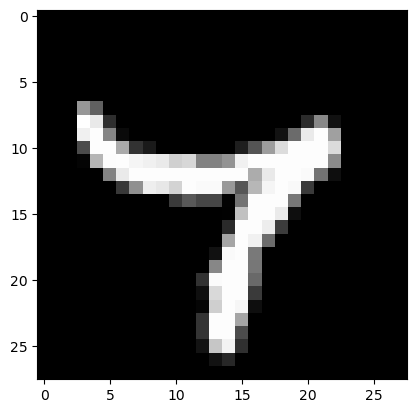

In [12]:

print(f'ce nombre est un {y_test[124]}')
display_image(x_test[124])

"""
Probabilité pour chacune des classes du modèle, c.a.d [proba de 0, proba de 1, ... ,proba de 9]
"""
model.predict_proba(imageTo1D(np.array([x_test[124]])))


In [14]:
"""
Prédiction sur l'ensemble du jeu de test
"""
pred = model.predict(imageTo1D(x_test))
"""
Liste des indices pour lesquelles la prédiction est fausse
"""
wrong_predictions = np.argwhere(y_test != pred)
wrong_predictions.shape 

(312, 1)

this is a 4.0 and a 0.0 has been predicted


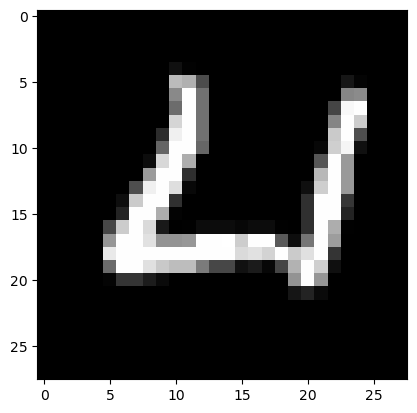

In [18]:
example_of_failure = wrong_predictions[0][0]
print(f"this is a {y_test[example_of_failure]} and a {pred[example_of_failure]} has been predicted")
display_image(x_test[example_of_failure])
